# Import The Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read Data

In [2]:
dataset_path = '/kaggle/input/seoul-bike-rental-ai-pro-iti/'

train_df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))

In [3]:
print("The shape of the dataset is {}.\n\n".format(train_df.shape))
print("The shape of the dataset is {}.\n\n".format(test_df.shape))

The shape of the dataset is (5760, 15).


The shape of the dataset is (3000, 14).




# Exploratory Data Analysis

In [4]:
train_df.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5760 non-null   int64  
 1   Date                       5760 non-null   object 
 2   y                          5760 non-null   int64  
 3   Hour                       5760 non-null   int64  
 4   Temperature(�C)            5760 non-null   float64
 5   Humidity(%)                5760 non-null   int64  
 6   Wind speed (m/s)           5760 non-null   float64
 7   Visibility (10m)           5760 non-null   int64  
 8   Dew point temperature(�C)  5760 non-null   float64
 9   Solar Radiation (MJ/m2)    5760 non-null   float64
 10  Rainfall(mm)               5760 non-null   float64
 11  Snowfall (cm)              5760 non-null   float64
 12  Seasons                    5760 non-null   object 
 13  Holiday                    5760 non-null   objec

## Rename columns

In [6]:
cols_to_rename = {'Temperature(�C)': 'temperature',
                   'Humidity(%)': 'humidity',
                  'Wind speed (m/s)': 'windspeed',
                  'Visibility (10m)': 'visibility',
                  'Dew point temperature(�C)': 'dewpoint',
                  'Solar Radiation (MJ/m2)': 'solarradiation',
                  'Rainfall(mm)': 'rainfall',
                  'Snowfall (cm)': 'snowfall',
                  'Functioning Day': 'functioningday'}
for df in [train_df, test_df]:
    df.rename(columns= cols_to_rename, inplace=True)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5760 non-null   int64  
 1   Date            5760 non-null   object 
 2   y               5760 non-null   int64  
 3   Hour            5760 non-null   int64  
 4   temperature     5760 non-null   float64
 5   humidity        5760 non-null   int64  
 6   windspeed       5760 non-null   float64
 7   visibility      5760 non-null   int64  
 8   dewpoint        5760 non-null   float64
 9   solarradiation  5760 non-null   float64
 10  rainfall        5760 non-null   float64
 11  snowfall        5760 non-null   float64
 12  Seasons         5760 non-null   object 
 13  Holiday         5760 non-null   object 
 14  functioningday  5760 non-null   object 
dtypes: float64(6), int64(5), object(4)
memory usage: 675.1+ KB


## check duplicates

In [8]:
train_df.duplicated().sum()

0

# Convert Date to datetime 

In [9]:
for df in [train_df, test_df]:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              5760 non-null   int64         
 1   Date            5760 non-null   datetime64[ns]
 2   y               5760 non-null   int64         
 3   Hour            5760 non-null   int64         
 4   temperature     5760 non-null   float64       
 5   humidity        5760 non-null   int64         
 6   windspeed       5760 non-null   float64       
 7   visibility      5760 non-null   int64         
 8   dewpoint        5760 non-null   float64       
 9   solarradiation  5760 non-null   float64       
 10  rainfall        5760 non-null   float64       
 11  snowfall        5760 non-null   float64       
 12  Seasons         5760 non-null   object        
 13  Holiday         5760 non-null   object        
 14  functioningday  5760 non-null   object        
dtypes: d

In [11]:
train_df.head()

,ID,Date,y,Hour,temperature,humidity,windspeed,visibility,dewpoint,solarradiation,rainfall,snowfall,Seasons,Holiday,functioningday
0,0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
train_df.describe()

,ID,y,Hour,temperature,humidity,windspeed,visibility,dewpoint,solarradiation,rainfall,snowfall
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,2879.500000,703.483854,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302
std,1662.913107,655.249491,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728
min,0.000000,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000
25%,1439.750000,188.000000,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000
50%,2879.500000,485.500000,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000
75%,4319.250000,1066.000000,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000
max,5759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


# working with Date column

In [13]:
#add month , day, year columns
for df in [train_df, test_df]:
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['day'] = df['Date'].dt.day

In [14]:
train_df_copy = train_df.copy() #contains main columns without feature processing

# add day of week

In [15]:
for df in [train_df, test_df]:
    df['dayofweek'] = df['Date'].dt.dayofweek

# add weekend

In [16]:
for df in [train_df, test_df]:
    df['weekend'] = (df['dayofweek'] >= 5 )*1

In [17]:
train_df.head()

,ID,Date,y,Hour,temperature,humidity,windspeed,visibility,dewpoint,solarradiation,rainfall,snowfall,Seasons,Holiday,functioningday,month,year,day,dayofweek,weekend
0,0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,4,0
1,1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,4,0
2,2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,4,0
3,3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,4,0
4,4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,4,0


In [18]:
train_df.head()

,ID,Date,y,Hour,temperature,humidity,windspeed,visibility,dewpoint,solarradiation,rainfall,snowfall,Seasons,Holiday,functioningday,month,year,day,dayofweek,weekend
0,0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,4,0
1,1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,4,0
2,2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,4,0
3,3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,4,0
4,4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017,1,4,0


## transform functioning day, holiday to 0,1

In [19]:
for df in [train_df, test_df]:
    df['Holiday'] = df['Holiday'].map({'Holiday': 1, 'No Holiday':0})
    df['functioningday'] = df['functioningday'].map({'Yes': 1, 'No':0})

# working with Hour column

count    5760.000000
mean       11.500000
std         6.922788
min         0.000000
25%         5.750000
50%        11.500000
75%        17.250000
max        23.000000
Name: Hour, dtype: float64


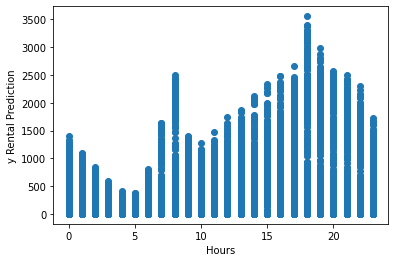

In [20]:
print(train_df.Hour.describe())
_ = plt.scatter(train_df['Hour'] ,train_df['y'])
_ = plt.xlabel('Hours')
_ = plt.ylabel('y Rental Prediction')
plt.show()

## bining hours

In [21]:
# ranges bins
bins = [-1, 6, 12, 18, 24]
#categorized hour
categorized_hour = pd.cut(train_df['Hour'], bins)
train_df['categorized_hour'] = categorized_hour

#test_df
categorized_hour = pd.cut(test_df['Hour'], bins)
test_df['categorized_hour'] = categorized_hour

# working with temperature column

-15.1
39.4


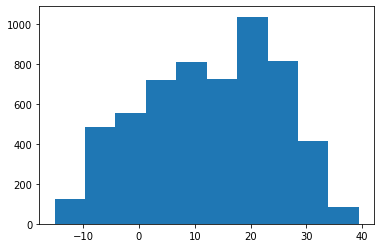

In [22]:
print(train_df.temperature.min())
print(train_df.temperature.max())
plt.hist(train_df.temperature)
plt.show()

## bining temperature into ranges

In [23]:
# ranges bins
bins = [-20, -10, 0, 10, 20, 30, 40]
#categorized temperature
categorized_temp = pd.cut(train_df['temperature'], bins)
train_df['categorized_temp'] = categorized_temp
train_df.categorized_temp

#test_df
categorized_temp = pd.cut(test_df['temperature'], bins)
test_df['categorized_temp'] = categorized_temp
test_df.categorized_temp

0       (-10, 0]
1       (-10, 0]
2       (-10, 0]
3       (-10, 0]
4       (-10, 0]
          ...   
2995     (0, 10]
2996     (0, 10]
2997     (0, 10]
2998     (0, 10]
2999     (0, 10]
Name: categorized_temp, Length: 3000, dtype: category
Categories (6, interval[int64]): [(-20, -10] < (-10, 0] < (0, 10] < (10, 20] < (20, 30] < (30, 40]]

# working with dewpoint

-26.9
27.2


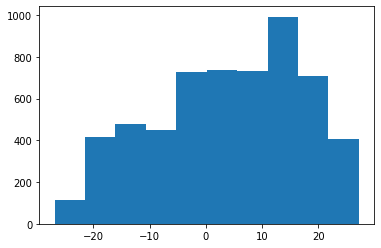

In [24]:
print(train_df.dewpoint.min())
print(train_df.dewpoint.max())
plt.hist(train_df.dewpoint)
plt.show()

## bining dewpoint

In [25]:
# ranges bins
bins = [-35, -20, -10, 0, 10, 20, 28]
#categorized temperature
categorized_dewpoint = pd.cut(train_df['dewpoint'], bins)
train_df['categorized_dewpoint'] = categorized_dewpoint

#test_df
categorized_dewpoint = pd.cut(test_df['dewpoint'], bins)
test_df['categorized_dewpoint'] = categorized_dewpoint

In [26]:
train_df.columns

Index(['ID', 'Date', 'y', 'Hour', 'temperature', 'humidity', 'windspeed',
       'visibility', 'dewpoint', 'solarradiation', 'rainfall', 'snowfall',
       'Seasons', 'Holiday', 'functioningday', 'month', 'year', 'day',
       'dayofweek', 'weekend', 'categorized_hour', 'categorized_temp',
       'categorized_dewpoint'],
      dtype='object')

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    5760 non-null   int64         
 1   Date                  5760 non-null   datetime64[ns]
 2   y                     5760 non-null   int64         
 3   Hour                  5760 non-null   int64         
 4   temperature           5760 non-null   float64       
 5   humidity              5760 non-null   int64         
 6   windspeed             5760 non-null   float64       
 7   visibility            5760 non-null   int64         
 8   dewpoint              5760 non-null   float64       
 9   solarradiation        5760 non-null   float64       
 10  rainfall              5760 non-null   float64       
 11  snowfall              5760 non-null   float64       
 12  Seasons               5760 non-null   object        
 13  Holiday           

## Try label encoding for year, month, dayofweek, Seasons, categorized_temp, categorized_dewpoint, categorized_hour

In [28]:
train_df['categorized_temp'] = train_df['temperature'].apply(lambda x: 1 if (x <= -10)
                                         else( 2 if x>-10 and x<=0   
                                             else( 3  if x>0 and x<=10
                                                 else( 4  if x>10 and x<=20
                                                      else (5 if x>20 and x<=30 else 6)) )))

train_df['categorized_temp'].value_counts()

test_df['categorized_temp'] = test_df['temperature'].apply(lambda x: 1 if (x <= -10)
                                         else( 2 if x>-10 and x<=0   
                                             else( 3  if x>0 and x<=10
                                                 else( 4  if x>10 and x<=20
                                                      else (5 if x>20 and x<=30 else 6)) )))

test_df['categorized_temp'].value_counts()

5    839
3    785
4    740
2    336
6    184
1    116
Name: categorized_temp, dtype: int64

In [29]:
train_df['categorized_dewpoint'] = train_df['dewpoint'].apply(lambda x: 1 if (x <= -20)
                                         else( 2 if x>-20 and x<=-10   
                                             else( 3  if x>-10 and x<=0
                                                 else( 4  if x>0 and x<=10
                                                      else (5 if x>10 and x<=20 else 6)) )))

train_df['categorized_dewpoint'].value_counts()

test_df['categorized_dewpoint'] = test_df['dewpoint'].apply(lambda x: 1 if (x <= -20)
                                         else( 2 if x>-20 and x<=-10   
                                             else( 3  if x>-10 and x<=0
                                                 else( 4  if x>0 and x<=10
                                                      else (5 if x>10 and x<=20 else 6)) )))

test_df['categorized_dewpoint'].value_counts()

4    975
5    593
3    563
6    399
2    294
1    176
Name: categorized_dewpoint, dtype: int64

In [30]:
train_df['categorized_hour'] = train_df['Hour'].apply(lambda x: 1 if (x <= 6)
                                         else( 2 if x>6 and x<=12   
                                             else( 3  if x>12 and x<=18
                                                 else( 4  if x>18 and x<= 24 else 5)) ))

train_df['categorized_hour'].value_counts()

test_df['categorized_hour'] = test_df['Hour'].apply(lambda x: 1 if (x <= 6)
                                         else( 2 if x>6 and x<=12   
                                             else( 3  if x>12 and x<=18
                                                 else( 4  if x>18 and x<= 24 else 5)) ))

test_df['categorized_hour'].value_counts()

1    875
2    750
3    750
4    625
Name: categorized_hour, dtype: int64

In [31]:
train_df['categorized_temp'].value_counts()

5    1548
4    1524
3    1358
2     890
6     328
1     112
Name: categorized_temp, dtype: int64

In [32]:
train_df['year'] = train_df['year'].map({2017: 1, 2018:2})
train_df['Seasons'] = train_df['Seasons'].map({'Summer': 1, 'Autumn': 2, 'Winter': 3, 'Spring': 4})

test_df['year'] = test_df['year'].map({2017: 1, 2018:2})
test_df['Seasons'] = test_df['Seasons'].map({'Summer': 1, 'Autumn': 2, 'Winter': 3, 'Spring': 4})

train_df.head()

,ID,Date,y,Hour,temperature,humidity,windspeed,visibility,dewpoint,solarradiation,...,Holiday,functioningday,month,year,day,dayofweek,weekend,categorized_hour,categorized_temp,categorized_dewpoint
0,0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,...,0,1,12,1,1,4,0,1,2,2
1,1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,...,0,1,12,1,1,4,0,1,2,2
2,2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,...,0,1,12,1,1,4,0,1,2,2
3,3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,...,0,1,12,1,1,4,0,1,2,2
4,4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,...,0,1,12,1,1,4,0,1,2,2


## month 

In [33]:
train_df['month'].value_counts()

4     480
8     480
12    480
1     480
5     480
9     480
2     480
6     480
10    480
3     480
7     480
11    480
Name: month, dtype: int64

In [34]:
train_df['month_categorized'] = train_df['month'].apply(lambda x: 1 if (x <= 2)
                                         else( 2 if x>2 and x<=5   
                                             else( 3  if x>5 and x<=8
                                                 else( 4  if x>8 and x<= 11 else 1)) ))

train_df['month_categorized'].value_counts()

test_df['month_categorized'] = test_df['month'].apply(lambda x: 1 if (x <= 2)
                                         else( 2 if x>2 and x<=5   
                                             else( 3  if x>5 and x<=8
                                                 else( 4  if x>8 and x<= 11 else 1)) ))

test_df['month_categorized'].value_counts()

2    768
3    768
4    744
1    720
Name: month_categorized, dtype: int64

## onehot encoding year, month, dayofweek, Seasons, categorized_temp, categorized_dewpoint, categorized_hour

In [35]:
# #transform to object to make getdummies
# train_df['year'] = train_df['year'].astype('object')
# train_df['month'] = train_df['month'].astype('object')
# train_df['dayofweek'] = train_df['dayofweek'].astype('object')

# cols_to_onehot = ['year','month','dayofweek','Seasons',
#                   'categorized_temp', 'categorized_dewpoint', 'categorized_hour']

# onehot_columns = pd.get_dummies(train_df[cols_to_onehot])
# train_df = pd.concat([train_df, onehot_columns], axis=1)
# # drop columns
# train_df.drop(cols_to_onehot, axis=1, inplace=True)

# #onhot encoding for test_df
# test_df['year'] = test_df['year'].astype('object')
# test_df['month'] = test_df['month'].astype('object')
# test_df['dayofweek'] = test_df['dayofweek'].astype('object')

# onehot_columns = pd.get_dummies(test_df[cols_to_onehot])
# test_df = pd.concat([test_df, onehot_columns], axis=1)
# # drop columns
# test_df.drop(cols_to_onehot, axis=1, inplace=True)

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    5760 non-null   int64         
 1   Date                  5760 non-null   datetime64[ns]
 2   y                     5760 non-null   int64         
 3   Hour                  5760 non-null   int64         
 4   temperature           5760 non-null   float64       
 5   humidity              5760 non-null   int64         
 6   windspeed             5760 non-null   float64       
 7   visibility            5760 non-null   int64         
 8   dewpoint              5760 non-null   float64       
 9   solarradiation        5760 non-null   float64       
 10  rainfall              5760 non-null   float64       
 11  snowfall              5760 non-null   float64       
 12  Seasons               5760 non-null   int64         
 13  Holiday           

# Correlation matrix

<AxesSubplot:>

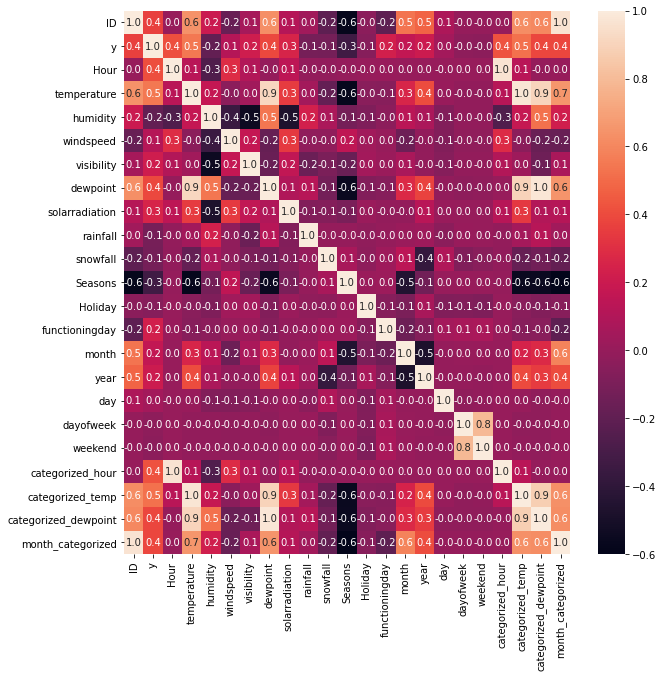

In [37]:
cor_mx=train_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor_mx,fmt='0.01f',annot=True)

In [38]:
cor_mx['y'].sort_values(ascending=False)

y                       1.000000
temperature             0.544281
categorized_temp        0.521838
categorized_hour        0.420785
Hour                    0.407180
dewpoint                0.392454
month_categorized       0.387001
categorized_dewpoint    0.382102
ID                      0.365359
solarradiation          0.250601
functioningday          0.227269
visibility              0.214777
year                    0.201837
month                   0.167181
windspeed               0.116380
day                     0.045897
dayofweek              -0.025528
weekend                -0.031387
Holiday                -0.058329
rainfall               -0.117711
snowfall               -0.120836
humidity               -0.191603
Seasons                -0.325915
Name: y, dtype: float64

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    5760 non-null   int64         
 1   Date                  5760 non-null   datetime64[ns]
 2   y                     5760 non-null   int64         
 3   Hour                  5760 non-null   int64         
 4   temperature           5760 non-null   float64       
 5   humidity              5760 non-null   int64         
 6   windspeed             5760 non-null   float64       
 7   visibility            5760 non-null   int64         
 8   dewpoint              5760 non-null   float64       
 9   solarradiation        5760 non-null   float64       
 10  rainfall              5760 non-null   float64       
 11  snowfall              5760 non-null   float64       
 12  Seasons               5760 non-null   int64         
 13  Holiday           

# Data Splitting

In [40]:
train_df.columns

Index(['ID', 'Date', 'y', 'Hour', 'temperature', 'humidity', 'windspeed',
       'visibility', 'dewpoint', 'solarradiation', 'rainfall', 'snowfall',
       'Seasons', 'Holiday', 'functioningday', 'month', 'year', 'day',
       'dayofweek', 'weekend', 'categorized_hour', 'categorized_temp',
       'categorized_dewpoint', 'month_categorized'],
      dtype='object')

In [41]:
train_df['Seasons'].value_counts()

4    1440
1    1440
2    1440
3    1440
Name: Seasons, dtype: int64

In [42]:
train_df.head()

,ID,Date,y,Hour,temperature,humidity,windspeed,visibility,dewpoint,solarradiation,...,functioningday,month,year,day,dayofweek,weekend,categorized_hour,categorized_temp,categorized_dewpoint,month_categorized
0,0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,...,1,12,1,1,4,0,1,2,2,1
1,1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,...,1,12,1,1,4,0,1,2,2,1
2,2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,...,1,12,1,1,4,0,1,2,2,1
3,3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,...,1,12,1,1,4,0,1,2,2,1
4,4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,...,1,12,1,1,4,0,1,2,2,1


## split according to days

In [43]:
full_train_df = train_df.copy() #to be used for trainig with all data

full_train_df = full_train_df.sample(frac=1, random_state=1).reset_index(drop=True)
                                                                        
train_df = full_train_df[full_train_df['day'] <= 15]
val_df = full_train_df[full_train_df['day'] >= 16]

X_train = train_df.drop(columns=['y','ID', 'Date', 'Seasons', 'day', 'dayofweek'])

y_train = np.log(train_df['y']+1)

X_val = val_df.drop(columns=['y','ID', 'Date', 'Seasons', 'day', 'dayofweek'])
y_val = np.log(val_df['y']+1)

print(len(train_df))
print(len(val_df))

X_train.head()

4320
1440


,Hour,temperature,humidity,windspeed,visibility,dewpoint,solarradiation,rainfall,snowfall,Holiday,functioningday,month,year,weekend,categorized_hour,categorized_temp,categorized_dewpoint,month_categorized
1,23,10.3,84,1.3,250,7.7,0.00,0.0,0.0,0,1,11,2,1,4,4,4,4
3,23,25.1,65,2.2,2000,18.0,0.00,0.0,0.0,0,1,9,2,1,4,5,5,4
4,19,28.2,64,2.8,1978,20.7,0.50,0.0,0.0,0,1,7,2,0,4,5,6,3
5,9,29.1,76,2.2,1041,24.4,1.38,0.0,0.0,0,1,8,2,1,2,5,6,3
6,4,-0.5,75,0.6,1967,-4.3,0.00,0.0,0.0,0,1,3,2,0,1,2,3,2


In [44]:
# from sklearn.model_selection import train_test_split

# full_train_df = train_df.copy() #to be used for trainig with all data

# train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# X_train = train_df.drop(columns=['y','ID', 'Date', 'categorized_hour', 'categorized_temp',
#                                  'categorized_dewpoint', 'Seasons', 'day', 'dayofweek'])
# y_train = train_df['y']

# X_val = val_df.drop(columns=['y','ID', 'Date', 'categorized_hour', 'categorized_temp',
#                                  'categorized_dewpoint', 'Seasons', 'day', 'dayofweek'])
# y_val = val_df['y']

# Model Training

## RMSLE Root mean squared logarithmic error

In [45]:
import math
import numpy as np
def RMSLE(predict, target):
    total = 0 
    for k in range(len(predict)):
        LPred= np.log1p(predict[k]+1)
        LTarg = np.log1p(target[k] + 1)
        if not (math.isnan(LPred)) and  not (math.isnan(LTarg)): 
            total = total + ((LPred-LTarg) **2)
        
    total = total / len(predict)        
    return np.sqrt(total)

# CatBoost

In [46]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cat  = CatBoostRegressor(iterations=3000, learning_rate=0.07, random_seed=45
                         ,verbose=200,loss_function="Huber:delta=200")


cat.fit(X_train,y_train,eval_set=(X_val, y_val),use_best_model=True)

score = cat.score(X_train, y_train)  
print("Training score: ", score)
vald_score = cat.score(X_val, y_val) 
print("Validation score: ", vald_score)

y_predicted = np.exp(cat.predict(X_val))-1

print ('My RMSLE for vald: ' + str(RMSLE(np.exp(cat.predict(X_val))-1,np.exp(np.array(y_val))-1) ))
print ('My RMSLE for train: ' + str(RMSLE(np.exp(cat.predict(X_train))-1,np.exp(np.array(y_train))-1) ))

0:	learn: 15.9862583	test: 16.6036918	best: 16.6036918 (0)	total: 52ms	remaining: 2m 35s
200:	learn: 0.0433250	test: 0.0676105	best: 0.0675264 (199)	total: 414ms	remaining: 5.77s
400:	learn: 0.0250782	test: 0.0642196	best: 0.0641588 (392)	total: 777ms	remaining: 5.03s
600:	learn: 0.0176477	test: 0.0636077	best: 0.0635676 (595)	total: 1.13s	remaining: 4.52s
800:	learn: 0.0135855	test: 0.0634362	best: 0.0634113 (781)	total: 1.5s	remaining: 4.1s
1000:	learn: 0.0108590	test: 0.0630960	best: 0.0630960 (1000)	total: 1.86s	remaining: 3.72s
1200:	learn: 0.0088400	test: 0.0630813	best: 0.0630136 (1020)	total: 2.23s	remaining: 3.34s
1400:	learn: 0.0074135	test: 0.0629542	best: 0.0629423 (1268)	total: 2.58s	remaining: 2.95s
1600:	learn: 0.0062965	test: 0.0629553	best: 0.0628672 (1474)	total: 2.96s	remaining: 2.59s
1800:	learn: 0.0053143	test: 0.0630604	best: 0.0628672 (1474)	total: 3.33s	remaining: 2.22s
2000:	learn: 0.0045855	test: 0.0630632	best: 0.0628672 (1474)	total: 3.69s	remaining: 1.84s
2

Shrink model to first 968 iterations.
Training score:  0.9939923069812867
Validation score:  0.945884782664018
My RMSLE for vald: 0.3541770271032328
My RMSLE for train: 0.13163407051825646

# Submission File Generation

In [47]:
X_test = test_df.copy()

# You should update/remove the next line once you change the features used for training
X_test = X_test.drop(columns=['ID', 'Date', 'Seasons', 'day', 'dayofweek'])

y_test_predicted = np.exp(cat.predict(X_test))-1

test_df['y'] = y_test_predicted.astype(int)

test_df.head()

,ID,Date,Hour,temperature,humidity,windspeed,visibility,dewpoint,solarradiation,rainfall,...,month,year,day,dayofweek,weekend,categorized_hour,categorized_temp,categorized_dewpoint,month_categorized,y
0,5760,2017-12-21,0,-1.3,90,2.0,259,-2.7,0.0,0.0,...,12,1,21,3,0,1,2,3,1,81
1,5761,2017-12-21,1,-1.8,90,1.6,263,-3.2,0.0,0.0,...,12,1,21,3,0,1,2,3,1,82
2,5762,2017-12-21,2,-2.2,88,1.4,348,-3.9,0.0,0.0,...,12,1,21,3,0,1,2,3,1,63
3,5763,2017-12-21,3,-2.9,89,1.3,288,-4.4,0.0,0.0,...,12,1,21,3,0,1,2,3,1,46
4,5764,2017-12-21,4,-3.6,91,1.2,241,-4.8,0.0,0.0,...,12,1,21,3,0,1,2,3,1,39


In [48]:
test_df[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)